In [2]:
set.seed(1234567890)
library("neuralnet")
dataset <- read.csv("creditset.csv")
head(dataset)


clientid income   age      loan      LTI          default10yr
1 1        66155.93 59.01702 8106.5321 0.1225367512 0          
2 2        34415.15 48.11715 6564.7450 0.1907515807 0          
3 3        57317.17 63.10805 8020.9533 0.1399397997 0          
4 4        42709.53 45.75197 6103.6423 0.1429105321 0          
5 5        66952.69 18.58434 8770.0992 0.1309895000 1          
6 6        24904.06 57.47161   15.4986 0.0006223321 0

In [30]:
## extract a set to train the NN
trainset <- dataset[1:800, ]

## select the test set
testset <- dataset[801:2000, ]

## vector specifiying hidden layers
v <- c(4)

In [36]:
## build the neural network (NN)
creditnet <- neuralnet(default10yr ~ LTI + age, trainset, hidden = v , lifesign = "minimal", 
    linear.output = FALSE, threshold = 0.1)

hidden: 4    thresh: 0.1    rep: 1/1    steps:   44429	error: 0.17499	time: 9.78 secs


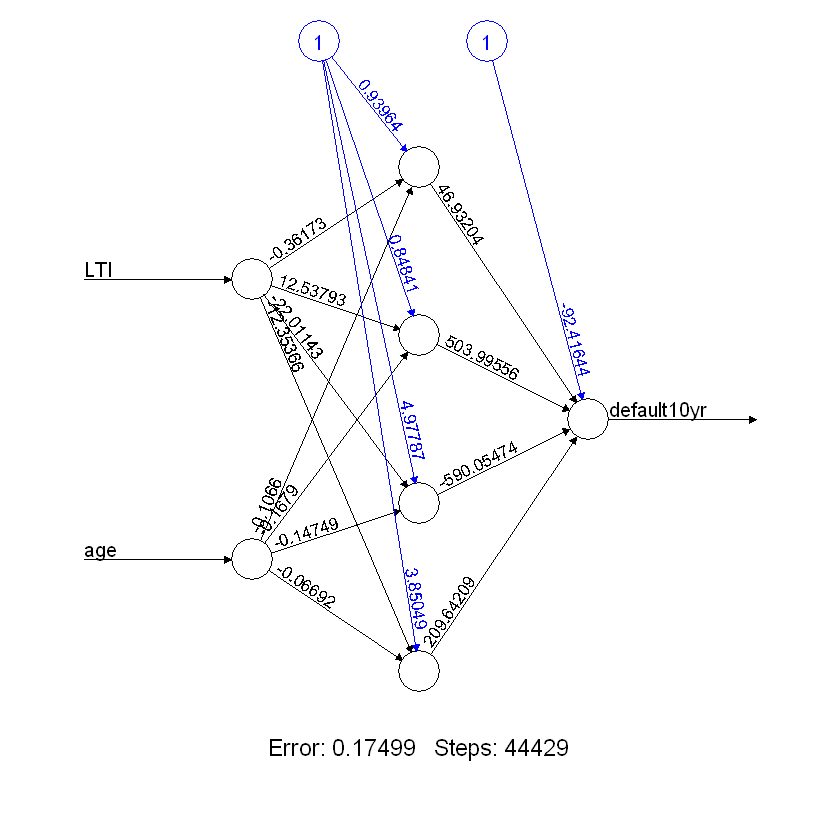

In [37]:
## plot the NN
plot(creditnet, rep = "best")

In [29]:
## test the resulting output
temp_test <- subset(testset, select = c("LTI", "age"))

creditnet.results <- compute(creditnet, temp_test)
head(temp_test)

results <- data.frame(actual = testset$default10yr, prediction = creditnet.results$net.result)
results[100:115, ]
results$prediction <- round(results$prediction)
results[100:115, ]

LTI        age     
801 0.02306809 25.90645
802 0.13729705 40.77431
803 0.10456985 32.47351
804 0.15985046 53.22813
805 0.11161430 46.47915
806 0.11489364 47.12737

actual prediction   
900 0       2.789429e-69
901 0       1.785021e-75
902 0       2.924951e-69
903 1       1.000000e+00
904 0       2.542135e-86
905 0       6.131540e-83
906 0       7.817446e-50
907 1       1.000000e+00
908 0       3.897006e-05
909 0       2.053017e-94
910 0       4.479502e-10
911 1       1.000000e+00
912 0      2.570016e-112
913 1       1.000000e+00
914 0       3.785202e-83
915 0       9.891799e-80

actual prediction
900 0      0         
901 0      0         
902 0      0         
903 1      1         
904 0      0         
905 0      0         
906 0      0         
907 1      1         
908 0      0         
909 0      0         
910 0      0         
911 1      1         
912 0      0         
913 1      1         
914 0      0         
915 0      0